In [191]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential #classs(model) linear stack of layers i
from tensorflow.keras.layers import Dense # in dense layer every mnode is connected to every node in the preceding layer
from tensorflow.keras.optimizers import Adam # optimiation algorithm -adaptive learning method algorithm. like the gradient metod used like last time
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [192]:
np.random.seed(0)
n_pts = 1000

In [193]:
X,y = datasets.make_circles(n_samples=n_pts, random_state=123, noise =0.3,factor=0.2) 
#(no. of pts, randm state of distribution everytime same, nosie(std deviation of gaussian noise so 
#that it is scattered more, factor is for relative size of outer circle to the inner circle = 20 percent
#of outer)
# print(X)
# print(y)

In [194]:
test=np.random.randint(0,1000,200)
#val=np.random.randint(0,1000,200)

train=np.setdiff1d(list(range(1000)),test)

print(test.mean())

X_train=np.array([X[i] for i in train])
X_test=np.array([X[i] for i in test])



509.855


In [195]:
y_train=np.array([y[i] for i in train])
y_test=np.array([y[i] for i in test])


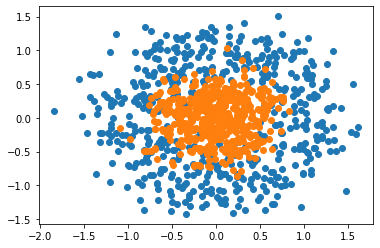

In [196]:
# grab all points with label zero and grab them and plot them together
#same for the y co-ordinates y==0 is a boolean check and next parameter is index
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])


In [172]:
# creating a deep neural network with 1 hidden layer
model = Sequential()
model.add(Dense(5, input_shape=(2,), activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

#(4 nodes in hidden layer for four different perceptron models to then combine in some sort of a circular decision biundary 
#,inputt shape is the no of innput nodes(2 classes so 2 nodes), activation function for probabilities,)

#in dense each node is connected to nodes in previous layer so by addng one more dense funcion 
#What were doing is adding anther node in front of the 4 nodes in hidden layer which are connedcted to input nodes

# now compile the model
model.compile(Adam(learning_rate=0.02), 'binary_crossentropy', metrics =['accuracy']) # binary CE because 2 classes



In [173]:
#to train a model t fit our data,
#one epoch is to large to feed a computer so batch size is a size of data fed in one go

h = model.fit(x=X_train, y=y_train, verbose=1, batch_size=20, epochs=100, shuffle='true',validation_data=(X_test,y_test))


Epoch 1/100
17/17 [==============================] - 0s 6ms/step - loss: 0.7139 - accuracy: 0.4912 - val_loss: 0.6927 - val_accuracy: 0.5800
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.6176 - val_loss: 0.6917 - val_accuracy: 0.5550
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.4647 - val_loss: 0.6911 - val_accuracy: 0.4950
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.4324 - val_loss: 0.6899 - val_accuracy: 0.5300
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5971 - val_loss: 0.6885 - val_accuracy: 0.6200
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.6206 - val_loss: 0.6865 - val_accuracy: 0.5850
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.4971 - val_loss: 0.6850 - val_accuracy: 0.5800
Epoch 8/100
1

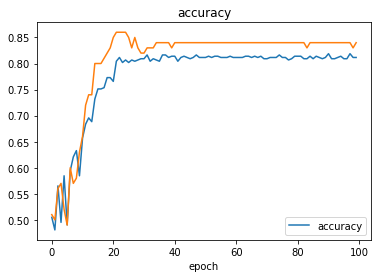

In [164]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

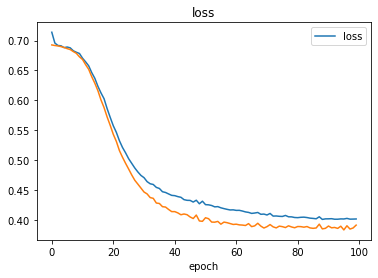

In [174]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

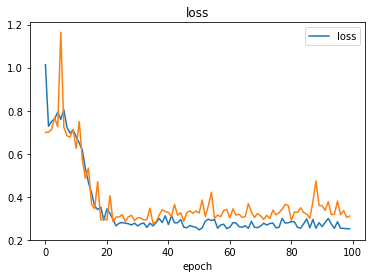

In [151]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.legend(['loss'])

In [175]:
def plot_decision_boundary(X, y, model): # vstack X-points, labels,model
    x_span = np.linspace(min(X[:,0])-0.2,max(X[:,0])+0.2) #minimum value in the x direction AND MAX VALUE IN THE x DiRECTioN
    y_span = np.linspace(min(X[:,1])-0.2,max(X[:,1])+0.2) # to add some breathing room in the x dorection and y deirection add to max and subtract from min
    xx,yy = np.meshgrid(x_span,y_span)   # takes x span elements(50) and returd a 2d 50x50 matrix copies of the rows and for y 50x50 copies of cols
  ## why to do this , usinng these 50x50 matrces we create 50x50 grid for every 1 y co ordinated there are 5 x co- ordinates.
  #now we need to convert this 2d array back to 1d so use ravel function to do so 
    xx_,yy_ = xx.ravel(),yy.ravel()
  # to mae a gid we have ti cncat these in a column wise manner
    grid = np.c_[xx_,yy_]
    predict_fn = model.predict(grid) # takes care of the the array of predictions
    z = predict_fn.reshape(xx.shape)
    plt.contourf(xx,yy,z) 

79/79 [==============================] - 0s 520us/step


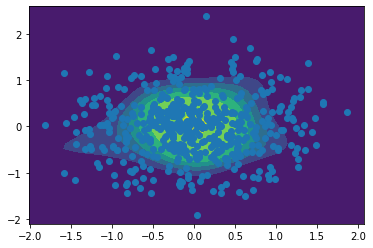

In [176]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

1/1 [==============================] - 0s 11ms/step
prediction is : [[0.03700678]]


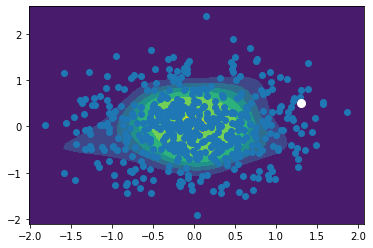

In [177]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])
x = 1.3
y = 0.5
point = np.array([[x,y]]) # co ordinates
prediction = model.predict(point) # feed the points in the model to predict it and plot it
plt.plot([x],[y], marker = "o", markersize=8,color="white")#requires list of x & y co-ordinte points but one point in list so [x],[y]
print("prediction is :", prediction)